In [115]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

In [116]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
# Jupyter notebook表示のため
# %matplotlib inline

In [117]:
#機械学習のライブラリ
import sklearn as skl
from sklearn.decomposition import PCA #主成分分析器

In [118]:
from sklearn.datasets import load_boston

In [119]:
dataset = load_boston()
dataset.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [120]:
x, y = dataset.data, dataset.target
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [121]:
dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [122]:
# dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [123]:
print(dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [124]:
import pandas as pd
df = pd.DataFrame(x, columns = dataset.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [125]:
df = df.drop(['PTRATIO', 'B', 'LSTAT'], axis=1)
# df['corect'] = y

In [126]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0


In [127]:
df.isna().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
dtype: int64

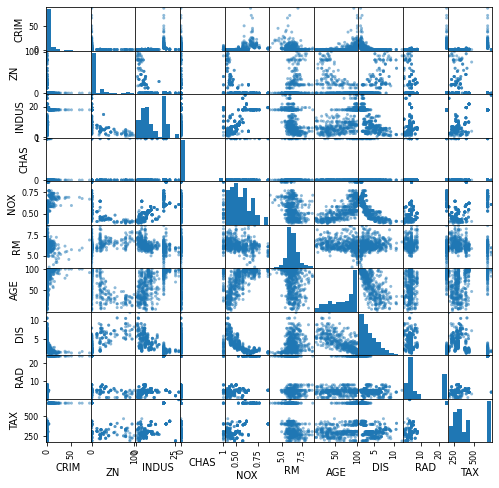

In [146]:
from pandas import plotting 
plotting.scatter_matrix(df, figsize=(8, 8), c=None, alpha=0.5, )
plt.show()

In [145]:
# scikit-learnで主成分分析
# 行列の標準化
dfs = df.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022


In [130]:
# 主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [131]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.503490,-0.424406,-0.186888,0.537806,0.302667,0.420093,-0.331282,0.565381,0.022111,0.395966
1,-1.268378,-0.778061,-0.628783,0.392925,0.556884,-0.007328,-0.480779,-0.483499,0.220703,-0.051303
2,-1.687976,-0.660284,0.043448,1.053394,0.513051,-0.431057,0.053222,-0.376242,0.374921,-0.003664
3,-2.336324,-0.293287,-0.080308,0.685168,0.710884,-0.750929,-0.221387,0.073703,0.610904,0.007988
4,-2.269019,-0.382210,0.046344,0.897149,0.726749,-0.636211,-0.379272,-0.072353,0.641789,0.007447


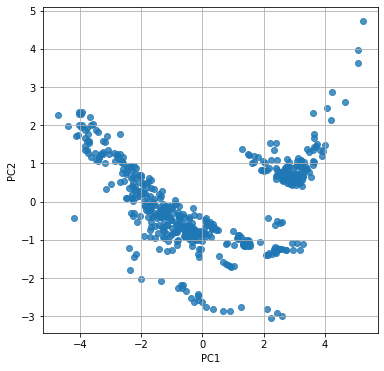

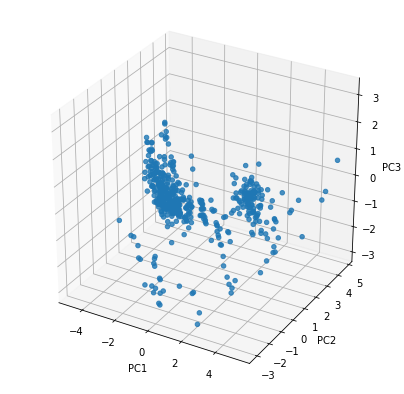

In [134]:
# 第一主成分と第二主成分でプロットする
# df.iloc[:, 0]は'Y'
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=None )
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 3D可視化
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

x = feature[:, 0]
y = feature[:, 1]
z = feature[:, 3]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.scatter(x, y, z,alpha=0.8, c=None,)
plt.show()

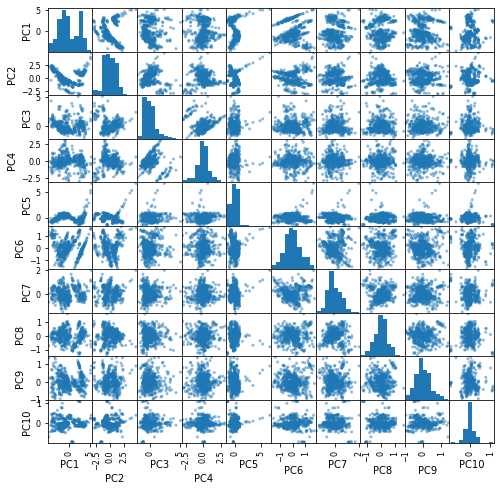

In [135]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=None, alpha=0.5) 
plt.show()

In [136]:
# 寄与率
pd.Series(pca.explained_variance_ratio_[2], index=['PC2'])

PC2    0.104475
dtype: float64

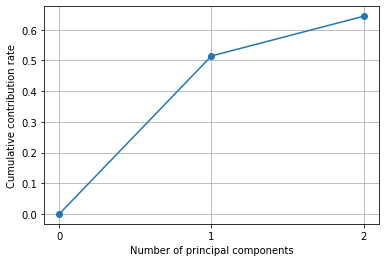

In [143]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_[0:2])), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [142]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])[:][0:2]

,0
PC1,5.145930
PC2,1.293772


In [141]:
# PCA の固有ベクトル　負荷量
pd.DataFrame(pca.components_, columns=df.columns, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])[:][0:2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
PC1,0.267876,-0.286016,0.383490,0.022079,0.388089,-0.181810,0.350917,-0.369479,0.346809,0.367808
PC2,0.440410,0.401289,-0.062792,-0.435732,-0.116405,-0.048566,-0.269766,0.285793,0.392180,0.356422


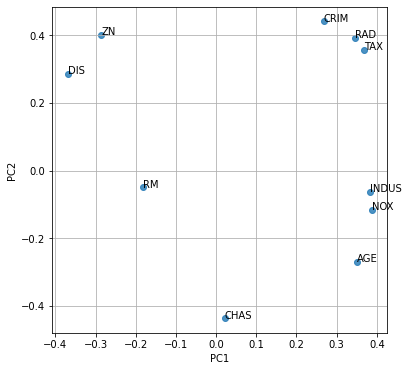

In [147]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[0:]):
    # 変数ラベル
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 3次元グラフで可視化

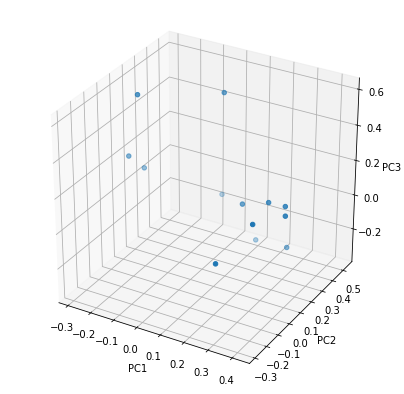

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

x = pca.components_[0]
y = pca.components_[1]
z = pca.components_[2]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.scatter(x, y, z)
plt.show()

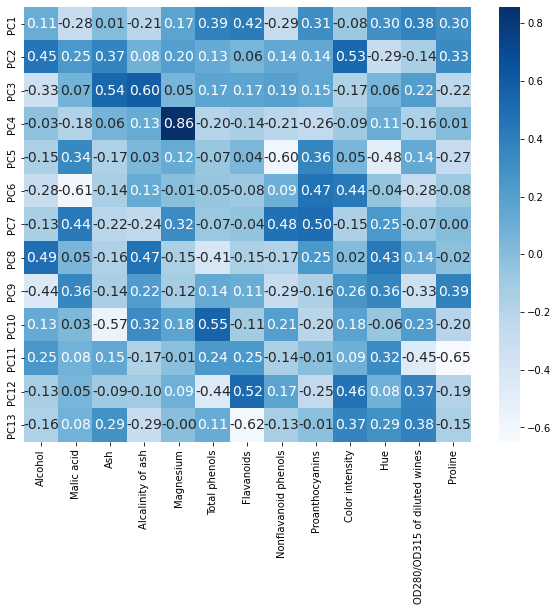

In [ ]:
# ヒートマップ
import seaborn as sns
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
sns.heatmap(pca.components_,
           cmap='Blues',
           annot=True,
           annot_kws={'size': 14},
           fmt='.2f',
           xticklabels=df.columns[1:],
           yticklabels=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'],
           ax=ax)
plt.show()

# 演習

In [ ]:
# 演習
dfs = dfs[['Color intensity', 'Flavanoids', 'Alcohol', 'Proline']]

In [ ]:
# 主成分分析を実行してください
pca1 = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [ ]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4
0,-0.778131,1.451878,0.859300,-0.281475
1,-1.651288,-0.673502,-0.267307,0.532522
2,0.607594,-0.801926,0.261188,0.122855
3,0.687761,-0.749089,-0.261819,-0.670017
4,0.129208,-0.885439,-0.260897,0.077270


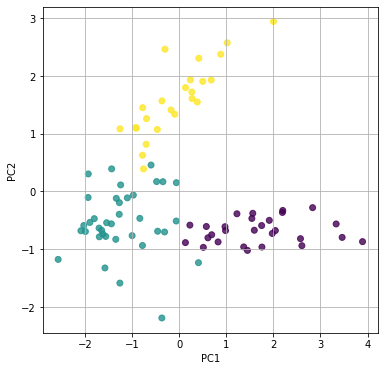

In [ ]:
# 第一主成分と第二主成分でプロットしてください
plt.figure(figsize=(6, 6))
# c=list(df.iloc[:, 0])の０はYのことは表している
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

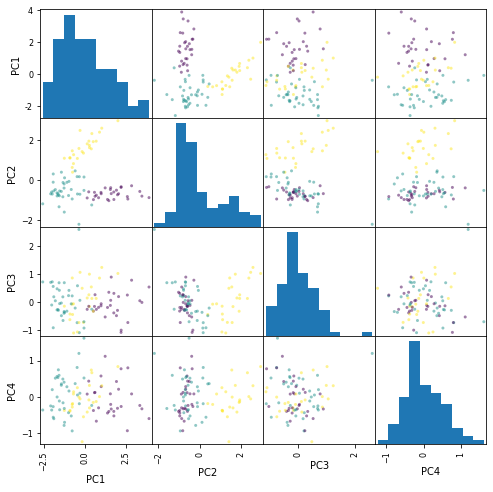

In [ ]:
# PC1〜PC4 で散布図行列を描いてください。
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [ ]:
# 寄与率を計算してください。
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.539161
PC2,0.301505
PC3,0.094402
PC4,0.064932


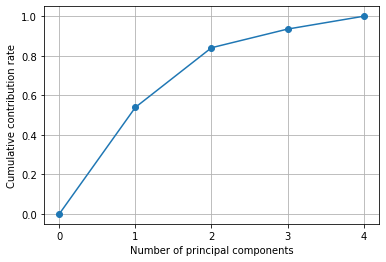

In [ ]:
# 累積寄与率を図示してください。
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [ ]:
# 各主成分の固有値を計算してください。
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,2.156643
PC2,1.206022
PC3,0.377609
PC4,0.259727


In [ ]:
# 各主成分の固有ベクトルを計算してください。
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[1:5], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,Alcohol,Malic acid,Ash,Alcalinity of ash
PC1,0.436323,0.333010,0.582551,0.599468
PC2,0.585560,-0.735953,0.234873,-0.245616
PC3,0.681043,0.383920,-0.613186,-0.113087
PC4,0.054054,0.447306,0.479033,-0.753341


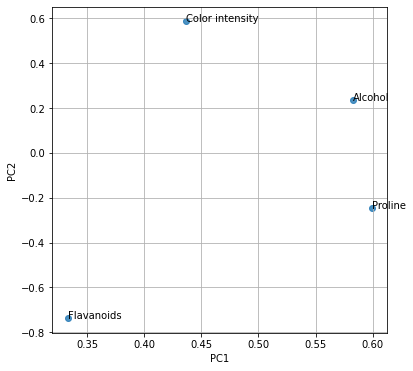

In [ ]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], ['Color intensity', 'Flavanoids', 'Alcohol', 'Proline']):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()